## Import libraries and examine data properties

### Import libraries

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
import calendar
import datetime

-------

In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  gray solid !important;
  color: black !important;
}
</style>

### Examine the data and its properties

In [3]:
# Import the data from our Data folder
df = pd.read_csv('Data/US_Executions.csv')  

In [4]:
# Check how many rows and columns are in the data
df.shape

(1529, 27)

In [5]:
# Look at the first five rows of data to see get an idea of the type of data we are working with
df.head(5)

,Execution#,Execution Date,First Name,Last Name,Middle Name(s),Suffix,Race,Sex,Region,State,...,Number of Latino Male Victims,Number of Asian Male Victims,Number of Native American Male Victims,Number of Other Race Male Victims,Number of White Female Victims,Number of Black Female Victims,Number of Latino Female Victims,Number of Asian Female Victims,Number of Native American Female Victims,Number of Other Race Female Victims
0,1,01/17/1977,Gary,Gilmore,Mark,NaN,White,Male,West,Utah,...,0,0,0,0,0,0,0,0,0,0
1,2,05/25/1979,John,Spenkelink,NaN,NaN,White,Male,South,Florida,...,0,0,0,0,0,0,0,0,0,0
2,3,10/22/1979,Jesse,Bishop,NaN,NaN,White,Male,West,Nevada,...,0,0,0,0,0,0,0,0,0,0
3,4,03/09/1981,Steven,Judy,NaN,NaN,White,Male,Midwest,Indiana,...,0,0,0,0,2,0,0,0,0,0
4,5,08/10/1982,Frank,Coppola,NaN,NaN,White,Male,South,Virginia,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Find which columns in the dataset have a null value

df.isnull().any()

Execution#                                  False
Execution Date                              False
First Name                                  False
Last Name                                   False
Middle Name(s)                               True
Suffix                                       True
Race                                        False
Sex                                         False
Region                                      False
State                                       False
County                                      False
Foreign National                            False
Execution Method                            False
Execution Volunteer                         False
Number of Victims                           False
Number of White Male Victims                False
Number of Black Male Victims                False
Number of Latino Male Victims               False
Number of Asian Male Victims                False
Number of Native American Male Victims      False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1529 entries, 0 to 1528
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Execution#                                1529 non-null   int64  
 1   Execution Date                            1529 non-null   object 
 2   First Name                                1529 non-null   object 
 3   Last Name                                 1529 non-null   object 
 4   Middle Name(s)                            432 non-null    object 
 5   Suffix                                    0 non-null      float64
 6   Race                                      1529 non-null   object 
 7   Sex                                       1529 non-null   object 
 8   Region                                    1529 non-null   object 
 9   State                                     1529 non-null   object 
 10  County                              

------

In [8]:
df.head(5)

,Execution#,Execution Date,First Name,Last Name,Middle Name(s),Suffix,Race,Sex,Region,State,...,Number of Latino Male Victims,Number of Asian Male Victims,Number of Native American Male Victims,Number of Other Race Male Victims,Number of White Female Victims,Number of Black Female Victims,Number of Latino Female Victims,Number of Asian Female Victims,Number of Native American Female Victims,Number of Other Race Female Victims
0,1,01/17/1977,Gary,Gilmore,Mark,NaN,White,Male,West,Utah,...,0,0,0,0,0,0,0,0,0,0
1,2,05/25/1979,John,Spenkelink,NaN,NaN,White,Male,South,Florida,...,0,0,0,0,0,0,0,0,0,0
2,3,10/22/1979,Jesse,Bishop,NaN,NaN,White,Male,West,Nevada,...,0,0,0,0,0,0,0,0,0,0
3,4,03/09/1981,Steven,Judy,NaN,NaN,White,Male,Midwest,Indiana,...,0,0,0,0,2,0,0,0,0,0
4,5,08/10/1982,Frank,Coppola,NaN,NaN,White,Male,South,Virginia,...,0,0,0,0,0,0,0,0,0,0


-----

## Basic EDA Questions

***Questions***

1. When was the first and last execution in the dataset
2. Which state(s) have had the highest number of executions
3. What is the most common first name of the executionees
4. What were the most popular execution methods
5. Average number of total victims per executionee
6. What is the distribution of race of the executionees


### 1. When was the first and last execution in the dataset

In [9]:
# First convert the Execution Date column to a 'Y/m/d' format
df['Execution Date'] = pd.to_datetime(df['Execution Date'], format='%m/%d/%Y').dt.date

In [10]:
# sort the values by fir
first_date = df['Execution Date'].min()
last_date = df['Execution Date'].max()

print(f'The first execution in this dataframe is {first_date}')
print(f'The last execution in this dataframe is {last_date}')

The first execution in this dataframe is 1977-01-17
The last execution in this dataframe is 2020-12-11


### 2. Which state(s) have had the highest number of executions

In [11]:
df_q2 = df.copy()
df_q2 = df_q2.groupby(['State']).size().sort_values(ascending = False).to_frame('Count').reset_index()
df_q2

,State,Count
0,Texas,570
1,Virginia,113
2,Oklahoma,112
3,Florida,99
4,Missouri,90
5,Georgia,76
6,Alabama,67
7,Ohio,56
8,South Carolina,43
9,North Carolina,43


### 3. What is the most common first name of the executionees

In [12]:
df_q3 = df.copy()
df_q3 = df_q3.groupby(['Middle Name(s)']).size().rename("Counts").sort_values(ascending = False).to_frame()
df_q3.head(15)

,Counts
Middle Name(s),
Lee,51
Wayne,23
Ray,19
Allen,14
Earl,10
Michael,9
Joe,8
Eugene,8
D.,8


### 4. What were the most popular execution methods

In [13]:
df_q4 = df.copy()
df_q4 = df_q4.groupby(['Execution Method']).size().rename("Counts").sort_values(ascending = False).to_frame().reset_index()
df_q4

,Execution Method,Counts
0,Lethal Injection,1349
1,Electrocution,163
2,Gas,11
3,Hanging,3
4,Firing Squad,3


In [14]:
df[df['Execution Method'] == 'Firing Squad']

,Execution#,Execution Date,First Name,Last Name,Middle Name(s),Suffix,Race,Sex,Region,State,...,Number of Latino Male Victims,Number of Asian Male Victims,Number of Native American Male Victims,Number of Other Race Male Victims,Number of White Female Victims,Number of Black Female Victims,Number of Latino Female Victims,Number of Asian Female Victims,Number of Native American Female Victims,Number of Other Race Female Victims
0,1,1977-01-17,Gary,Gilmore,Mark,NaN,White,Male,West,Utah,...,0,0,0,0,0,0,0,0,0,0
316,317,1996-01-26,John,Taylor,Albert,NaN,White,Male,West,Utah,...,0,0,0,0,1,0,0,0,0,0
1216,1217,2010-06-18,Ronnie,Gardner,NaN,NaN,White,Male,West,Utah,...,0,0,0,0,0,0,0,0,0,0


### 5. Average number of total victims per executionee

In [15]:
df_q5 = df.copy()
df_q5 = df_q5.groupby(['Execution Method'])[['Number of Victims']].mean().sort_values(by = 'Number of Victims',ascending = False)
df_q5

,Number of Victims
Execution Method,
Hanging,2.666667
Gas,1.545455
Electrocution,1.441718
Lethal Injection,1.424759
Firing Squad,1.000000


In [16]:
df_q5['Number of Victims'].mean()

1.6157196168665695

### 6. What is the distribution of race of the executionees

                 Total
Race                  
White              853
Black              521
Latino             129
Native American     17
Asian                6
Other Race           3


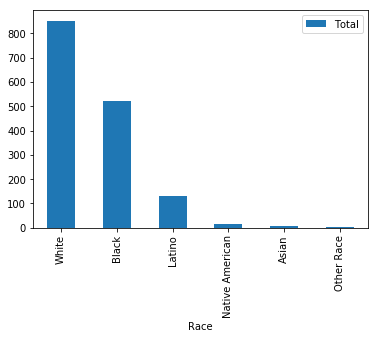

In [17]:
df_q6 = df.copy()
df_q6 = df_q6.groupby(['Race']).size().to_frame('Total').sort_values(by='Total', ascending=False)
print(df_q6)
ax = df_q6.plot.bar()
ax

-----------

## Look at multiple variables

***Questions***

1. Number of executionees by year 
2. Number of executionees by year by Race
3. Number of executionees by year by State

### 1. Number of executionees by year

In [18]:
#Create a new Year column
df['Execution Year'] = pd.DatetimeIndex(df['Execution Date']).year

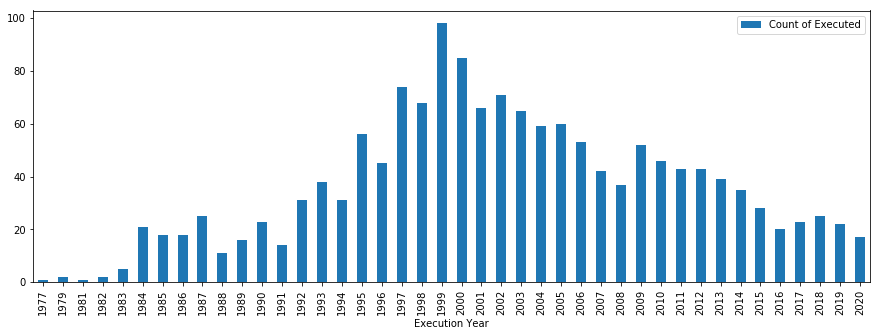

In [19]:
df_copy = df.copy()
df_copy = df_copy.groupby(['Execution Year']).size().to_frame("Count of Executed").reset_index().sort_values(by='Execution Year')
df_copy.plot.bar(x='Execution Year', y='Count of Executed', figsize=(15,5))

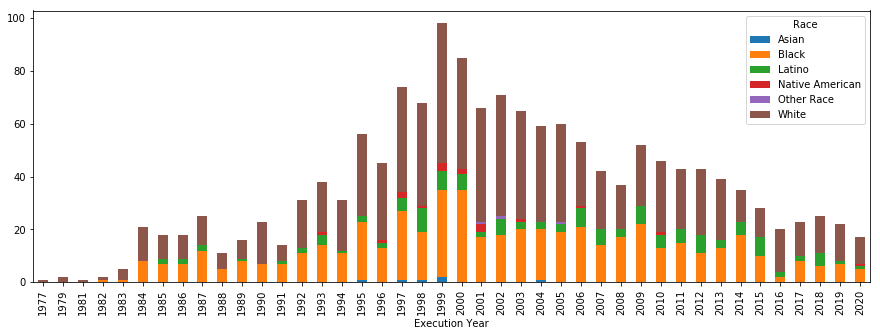

In [20]:
df_copy = df.copy()
df_copy = df_copy.groupby(['Execution Year','Race']).size().unstack('Race').sort_values(by='Execution Year')
df_copy.plot.bar(figsize=(15,5), stacked=True)

### 2. Number of executionees by Year by Race

In [21]:
df_copy = df.copy()
df_copy = df_copy.groupby(['Race','Execution Year']).size().to_frame("Count of Executed").reset_index().sort_values(by='Execution Year', ascending=True)
df_copy

,Race,Execution Year,Count of Executed
92,White,1977,1
93,White,1979,2
94,White,1981,1
5,Black,1982,1
95,White,1982,1
...,...,...,...
76,Latino,2019,1
43,Black,2020,5
77,Latino,2020,1
88,Native American,2020,1


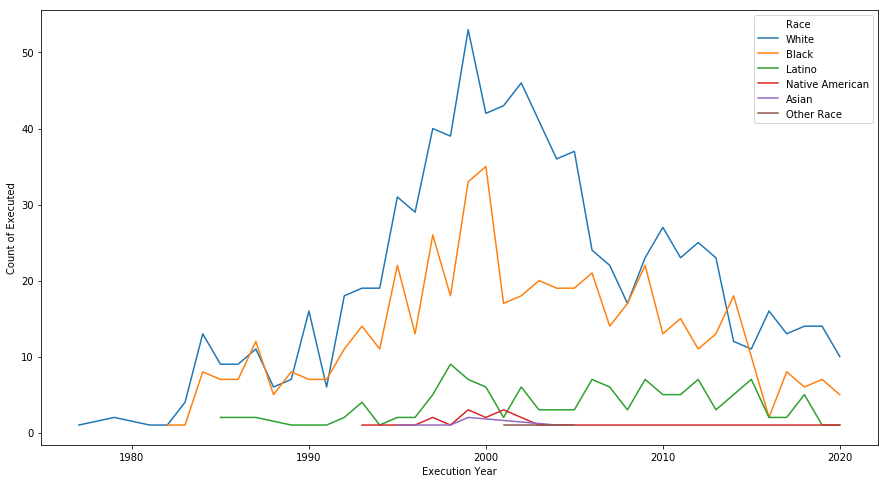

In [22]:
# Plot
plt.figure(figsize=(15,8)) # Set size of the plot
ax = sns.lineplot (data=df_copy, x='Execution Year', y='Count of Executed', hue='Race')
ax.legend(bbox_to_anchor=(1, 1)) # move legend to outside of graph to avoid it appearing right in the middle

### 3. Number of executionees by Year by State

In [23]:
df_copy = df.copy()
df_copy = df_copy.groupby(['State','Execution Year']).size().to_frame("Count of Executed").reset_index().sort_values(by='Execution Year', ascending=True)
df_copy

,State,Execution Year,Count of Executed
373,Utah,1977,1
81,Florida,1979,1
236,Nevada,1979,1
159,Indiana,1981,1
335,Texas,1982,1
...,...,...,...
26,Alabama,2020,1
372,Texas,2020,3
148,Georgia,2020,1
228,Missouri,2020,1


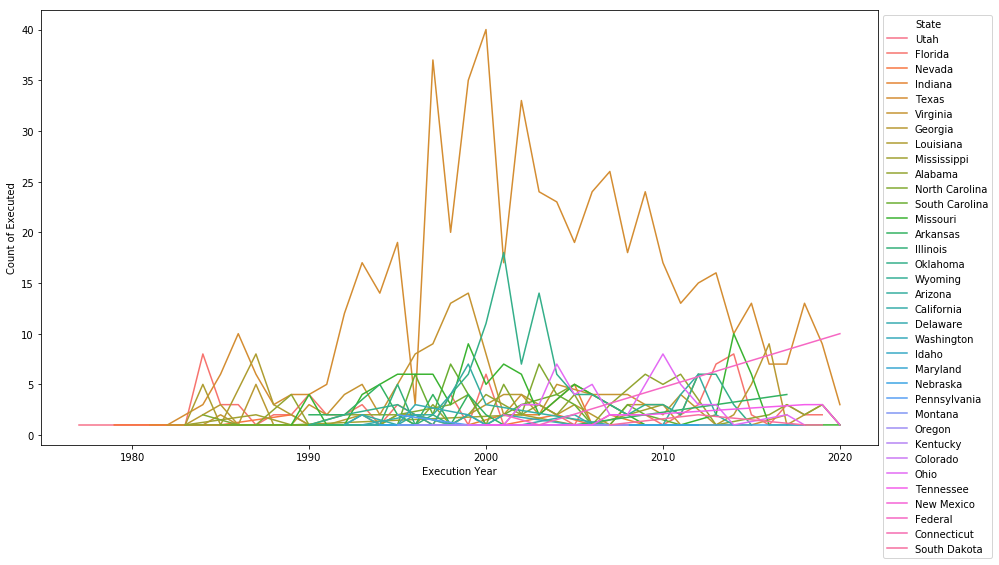

In [24]:
# Plot
plt.figure(figsize=(15,8)) # Set size of the plot
ax = sns.lineplot (data=df_copy, x='Execution Year', y='Count of Executed', hue='State')
ax.legend(bbox_to_anchor=(1, 1)) # move legend to outside of graph to avoid it appearing right in the middle

In [25]:
list_of_top = ['Texas','Virginia','Oklahoma','Florida','Federal']
df_copy = df_copy[(df_copy['State'].isin(list_of_top))]
df_copy

,State,Execution Year,Count of Executed
81,Florida,1979,1
335,Texas,1982,1
380,Virginia,1982,1
82,Florida,1983,1
381,Virginia,1984,1
...,...,...,...
370,Texas,2018,13
371,Texas,2019,9
117,Florida,2019,2
372,Texas,2020,3


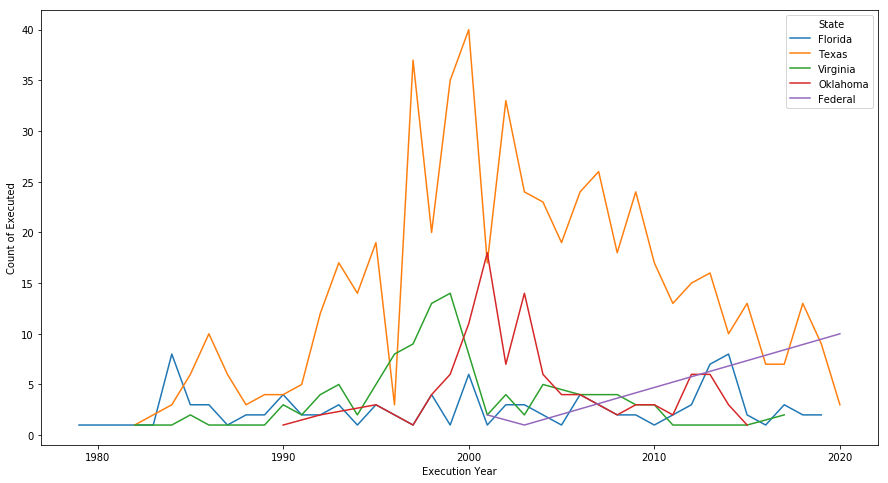

In [26]:
# Plot
plt.figure(figsize=(15,8)) # Set size of the plot
ax = sns.lineplot (data=df_copy, x='Execution Year', y='Count of Executed', hue='State')

### 4. Has there been a change in execution method over time?

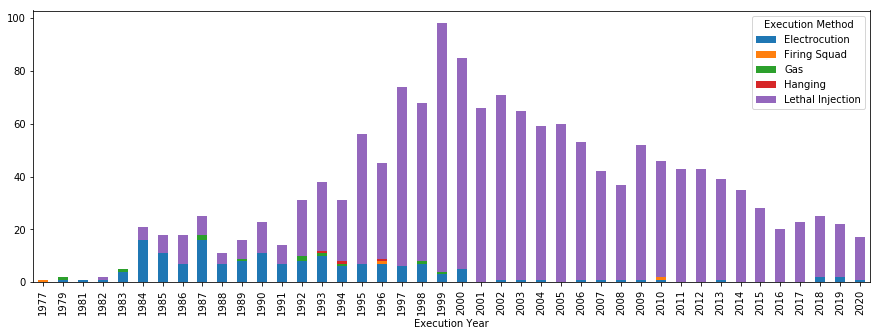

In [27]:
df_copy = df.copy()
df_copy = df_copy.groupby(['Execution Year','Execution Method']).size().unstack('Execution Method').sort_values(by='Execution Year')
df_copy.plot.bar(figsize=(15,5), stacked=True)